In [386]:
# importing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [388]:
# Using dataframe loading dataset and displaying first few entries using the head

data= pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [390]:
#Validating if there is NaN or null values in dataset

print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [392]:
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [394]:
#Generating statistical summary for numerical columns
data_cleaned.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [396]:
def calculate_statistics(data_cleaned):
    """
    Calculate the mean, median, and standard deviation for numeric columns.   
    
    """
    # By using numpy module selecting only numeric columns in dataset
    num_df = data.select_dtypes(include=[np.number])
    
    # Calculate mean, median, and standard deviation for the nunerical columns derived
    statistics_analysis = {
        "mean": num_df.mean(),
        "median": num_df.median(),
        "standard deviation": num_df.std(),
        "skewness": num_df.skew(),
        "kurtosis": num_df.kurt()
    }
    
    # The statistics is obtained has dictonary,converting dictonary to readable dataframe 
    statics_df = pd.DataFrame(statistics_analysis)
    
    return statics_df

In [398]:
calculate_statistics(data_cleaned)

,mean,median,standard deviation,skewness,kurtosis
BALANCE,1564.474828,873.385231,2081.531879,2.393386,7.674751
BALANCE_FREQUENCY,0.877271,1.000000,0.236904,-2.023266,3.092370
PURCHASES,1003.204834,361.280000,2136.634782,8.144269,111.388771
ONEOFF_PURCHASES,592.437371,38.000000,1659.887917,10.045083,164.187572
INSTALLMENTS_PURCHASES,411.067645,89.000000,904.338115,7.299120,96.575178
CASH_ADVANCE,978.871112,0.000000,2097.163877,5.166609,52.899434
PURCHASES_FREQUENCY,0.490351,0.500000,0.401371,0.060164,-1.638631
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.083333,0.298336,1.535613,1.161846
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.166667,0.397448,0.509201,-1.398632
CASH_ADVANCE_FREQUENCY,0.135144,0.000000,0.200121,1.828686,3.334734


In [401]:

def linear_fit(x, y):
    """
    Compute the slope and intercept using least-squares method.
    Returns slope, intercept, and residuals.
    """

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate slope (m) and intercept (b)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    
    # Calculate residuals
    fitted_values = slope * x + intercept
    residuals = y - fitted_values
    
    return slope, intercept, residuals,fitted_values


In [403]:
def plot_line_with_data(x, y):
    """
    Plot the scatter points, regression line, and residual-based confidence interval.
    """
    slope, intercept, residuals, fitted_values = linear_fit(x, y)
    
    # Calculate standard error of the residuals
    std_error = np.std(residuals, ddof=2)

    # Calculate degrees of freedom
    df = len(x) - 2  # degrees of freedom for the regression model (n - 2)

    # Calculate the t-value for 95% confidence interval
    t_value = stats.t.ppf(0.95, df)

    # Calculate margin of error
    margin_of_error = t_value * std_error
    
    # Calculate upper and lower bounds of the confidence interval
    ci_upper = fitted_values + margin_of_error
    ci_lower = fitted_values - margin_of_error

    # Sort x and corresponding y values for plotting
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    fitted_sorted = fitted_values[sorted_indices]
    ci_upper_sorted = ci_upper[sorted_indices]
    ci_lower_sorted = ci_lower[sorted_indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=0.5, label='Data Points')
    plt.plot(x_sorted, fitted_sorted, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
    plt.fill_between(x_sorted, ci_lower_sorted, ci_upper_sorted, color='red', alpha=0.2, label='95% Confidence Interval')
    plt.fill_between(x_sorted,fitted_sorted+std_error,fitted_sorted-std_error,color='green',alpha=0.2,label="Std error")
    
    # Labels and legend
    plt.title('One-Off Purchases vs Total Purchases')
    plt.xlabel('One-Off Purchases ($)')
    plt.ylabel('Total Purchases ($)')
    #plt.xlim([0, 30000])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




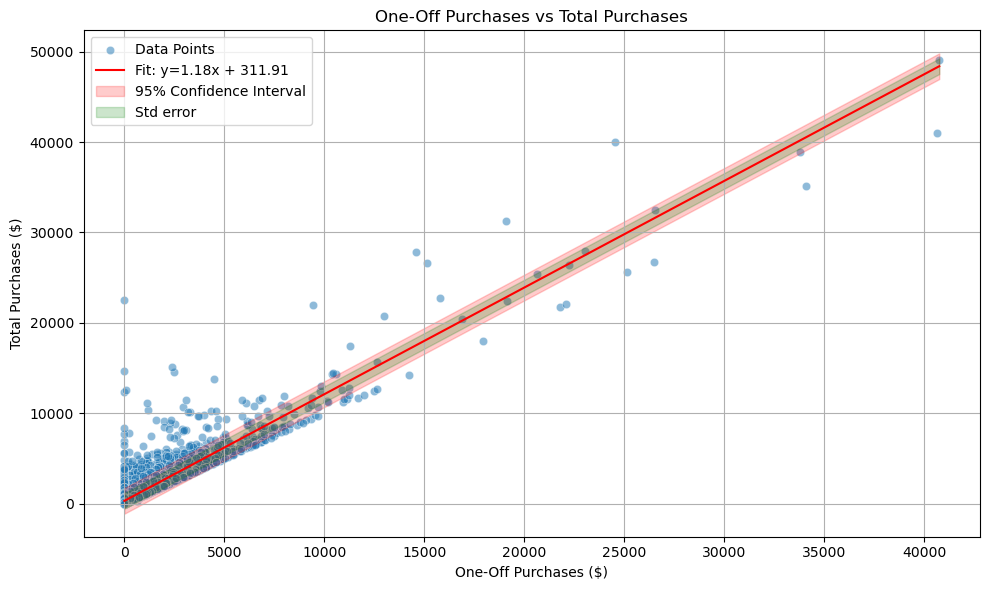

In [405]:
oneoff_purchases = data_cleaned['ONEOFF_PURCHASES'].values
total_purchases = data_cleaned['PURCHASES'].values
# Plot the results
plot_line_with_data(oneoff_purchases, total_purchases)


In [413]:
def perform_kmeans_clustering(data, n_clusters, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    return labels, cluster_centers


In [417]:
def plot_kmeans_clusters(data, labels, cluster_centers, x_col, y_col):
    labels, cluster_centers = perform_kmeans_clustering(X_balance_payments, n_clusters=3)
    plt.figure(figsize=(10, 6))
    plt.scatter(data['BALANCE'], data['PAYMENTS'], c=labels, cmap='viridis', s=10)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.title('KMeans Clustering of BALANCE vs PAYMENTS')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()


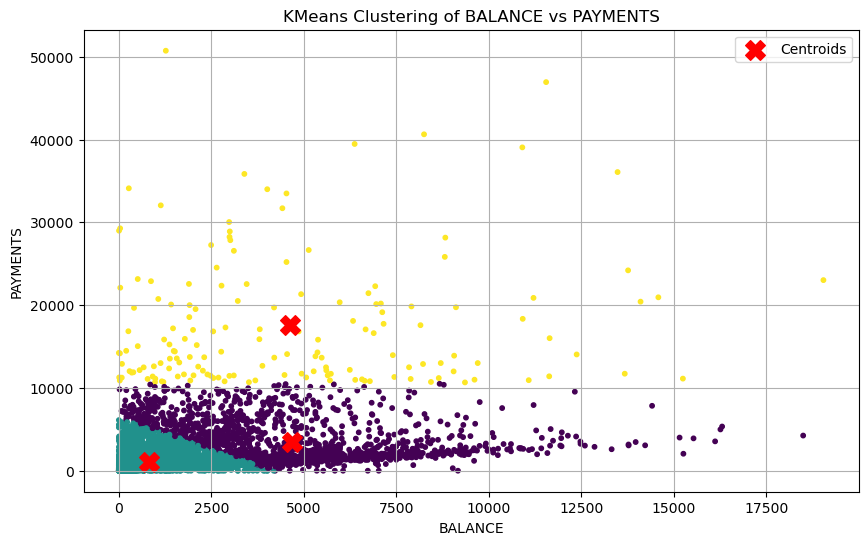

In [419]:

# Perform KMeans clustering


# Plot the clusters
plot_kmeans_clusters(X_balance_payments, labels, cluster_centers, 'BALANCE', 'PAYMENTS')


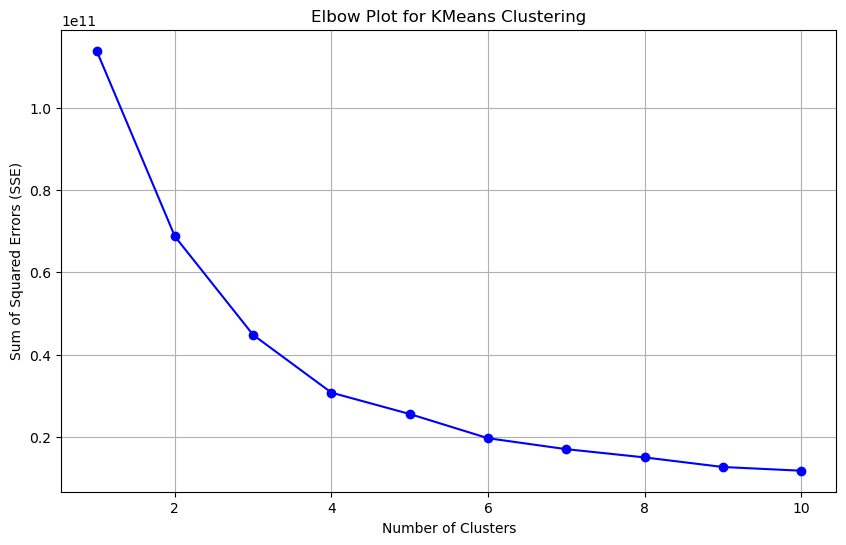

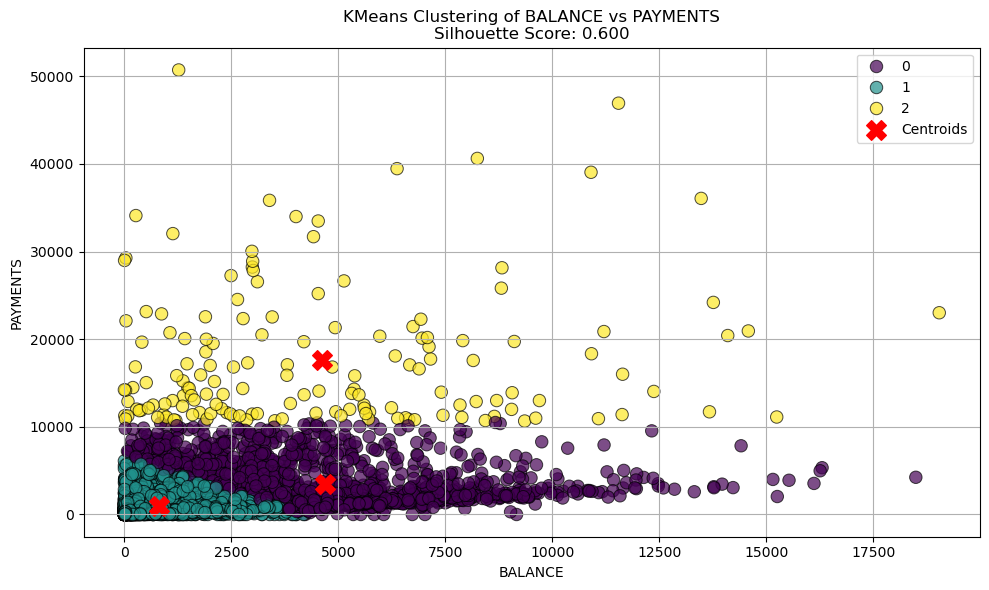

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform KMeans clustering and compute Silhouette Score
def kmeans_with_silhouette(data, n_clusters=4):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(data, kmeans_labels)
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['BALANCE'], y=data['PAYMENTS'], hue=kmeans_labels, palette='viridis', s=80, alpha=0.7, edgecolor='k')
    
    # Plot centroids
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Display Silhouette Score
    plt.title(f'KMeans Clustering of BALANCE vs PAYMENTS\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('BALANCE')
    plt.ylabel('PAYMENTS')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return silhouette_avg

# Example usage for your dataset
silhouette_avg = kmeans_with_silhouette(X_balance_payments, n_clusters=3)
